In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diabetes.csv")

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Some EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- since there are no null values, and according to my data i dont need 0 values in some column such as
* Glucose, BloodPressure, SkinThickness, Insulin, BMI  these columns cannot have 0 values soo i'll fix if they have some   

In [7]:
# check zeros values present in all columns

(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
# Replacing 0 with mean values
data["Glucose"].replace(0,data["Glucose"].mean(), inplace = True)
data["BloodPressure"].replace(0,data["BloodPressure"].mean(), inplace = True)
data["SkinThickness"].replace(0,data["SkinThickness"].mean(), inplace = True)
data["Insulin"].replace(0,data["Insulin"].mean(), inplace = True)
data["BMI"].replace(0,data["BMI"].mean(), inplace = True)

In [9]:
(data == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## 

In [10]:
data[data.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot:>

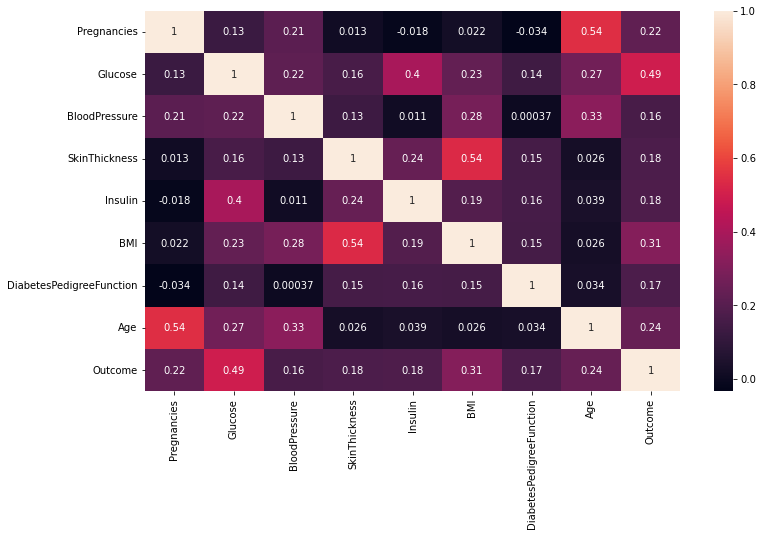

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot = True)

## Divide the data into independant and dependant features

In [12]:
X = data.iloc[:,:-1]  # input is features of patients
Y = data.iloc[:,-1]   # output is type of result from it

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [14]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((576, 8), (192, 8), (576,), (192,))

## 

## Now Standardize my Input/Independant feature X_train, X_test data

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.fit_transform(X_test)

## 

## Now Apply Logestic Regression to X_scaled_train, Y_train data

In [17]:
from sklearn.linear_model import LogisticRegression

classifer = LogisticRegression()

In [18]:
classifer.fit(X_scaled_train, Y_train)

LogisticRegression()

### Predictions

In [19]:
Y_test_predict = classifer.predict(X_scaled_test)

Y_test_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## 

## Calculate Performance Metrics i.e Errors of actuall vs predict
- using confussion metrics, accuracy, classification report

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(Y_test,Y_test_predict))
print(accuracy_score(Y_test,Y_test_predict))
print(classification_report(Y_test,Y_test_predict))

[[117  13]
 [ 26  36]]
0.796875
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



#### Observation
- my data is 75% accurate need improvements

## 

## Hyperparameter tuning
- in case u r not getting good accuracy, using hyperparameter tuning we will get best parameter according to our trained model and help u increase accuracy of ur model

- there are two method to do soo
- 1) GridSearchCV
- 2) RandomSearchCV

### Also you can also specify required CrossValidation technique in order to split ur data into validation, including number of experiments to do so

In [21]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [22]:
parameter = { "penalty": ['l1', 'l2', 'elasticnet', None],
              "C": [1,10],
              "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']   
}

### 1) GridSearchCV method

- i am using kfold cross validation with no of experiments = 5

In [23]:
Kfold_CV = GridSearchCV( classifer, param_grid = parameter, cv = 5)

In [24]:
Kfold_CV.fit(X_scaled_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [25]:
Kfold_CV.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [26]:
Kfold_CV.best_score_

0.7725637181409295

### Predictions with this method

In [27]:
Y_test_predict = Kfold_CV.predict(X_scaled_test)

### Classification matrix of predicted y test and actual y test

In [28]:
cof_matrix = confusion_matrix(Y_test,Y_test_predict)

print(cof_matrix)

[[117  13]
 [ 26  36]]


### Finding TP FP FN TN using confusion_matrix

In [29]:
TP = cof_matrix[0][0]
FP = cof_matrix[0][1]
FN = cof_matrix[1][0]
TN = cof_matrix[1][1]

### Accuracy

In [30]:
accuracy = (TP + TN) / (TP + FP + FN + TN)

print(accuracy)

0.796875


### Precision

In [31]:
Precision = TP / (TP + FP)

print(Precision)

0.9


### Recall

In [32]:
Recall = TP / (TP + FN)

print(Recall)

0.8181818181818182


### F1_Score

- since both TN and FN is important soo beta = 1

In [33]:
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

print(F1_score)

0.8571428571428572


## 

## Pickling these Regression

In [34]:
import pickle

pickle.dump(scaler,(open("StandardScaler.pkl","wb")))
pickle.dump(classifer,(open("classifer.pkl","wb")))